Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


<function matplotlib.pyplot.show(*args, **kw)>

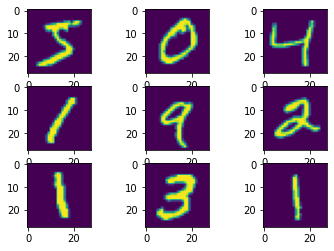

In [1]:
### Imports ###

### Keras includes the mnist dataset ###
from keras.datasets import mnist 
from keras.utils import to_categorical


### To some example from the mnist dataset let's use maatplotlib and plot the images and other utilities ###
from matplotlib import pyplot 
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
import sys
from numpy import mean
from numpy import std

### Keras Libraries 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import BatchNormalization


### Now, let us create the train and test sets - for X (The images themselves) and y (The classification label) ###
(trainsetX, trainsety),(testsetX,testsety) = mnist.load_data()

### Let's take sneak peak about the count of the images in the set and the resolution of the images ###
print('Train: X = {}, y = {}'.format(trainsetX.shape, trainsety.shape)) ### The train set ###
print('Test: X = {}, y = {}'.format(testsetX.shape, testsety.shape))

### A for loop to plot and see one each of numbers ###
for image in range(9):
  pyplot.subplot(330 + 1 + image)
  pyplot.imshow( trainsetX[image])
pyplot.show

In [2]:
### Let's start with the datatype of the dataset ###

print( " Data Type of Images: " , trainsetX.dtype )
print( " Data Type of Labels: " , trainsety.dtype )

### The dataset is consistently uint8

 Data Type of Images:  uint8
 Data Type of Labels:  uint8


<ipython-input-3-d3381a54da78>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


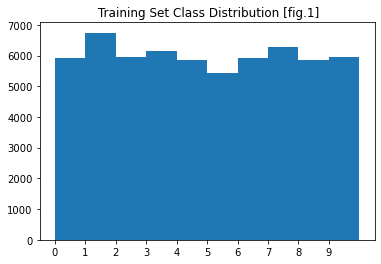

In [3]:
figure , axis = pyplot.subplots()
axis.hist( trainsety , bins = range(11))
axis.set_xticks( range(10))
axis.set_title(" Training Set Class Distribution [fig.1]")

figure.show()


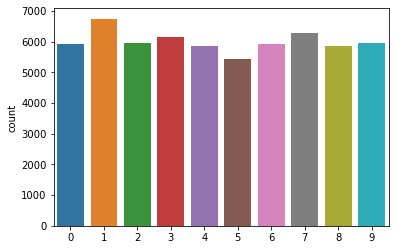

In [4]:
sns.countplot(trainsety)

In [5]:
### Loading the Dataset ###

( trainX , trainy ),( testX , testy )= mnist.load_data()

### Reshaping the dataset to contain single colour ###

trainX = trainX.reshape((trainX.shape[0] , 28 , 28 , 1 ))  ### Similarly , 
testX = testX.reshape((testX.shape[0], 28 , 28 , 1 ))

In [6]:
### One-Hot encoding target values ###

trainy = to_categorical( trainy )
testy = to_categorical( testy )

In [7]:
def load_dataset():

  ( trainX , trainy ), ( testX , testy ) = mnist.load_data()

  trainX = trainX.reshape(( trainX.shape[0] , 28 , 28 , 1 ))
  testX = testX.reshape((testX.shape[0] , 28 , 28 , 1 ))

  trainy = to_categorical(trainy)
  testy = to_categorical(testy)

  return trainX, trainy, testX, testy

In [8]:
def normalization(train, test):

	# Converstion from integers to floats data type
	train_norma = train.astype('float32')
	test_norma = test.astype('float32')
 
	# Normalize to range 0-1
	train_norma = train_norma / 255.0
	test_norma = test_norma / 255.0

	# Return the normalized images
	return train_norma, test_norma

In [9]:
### CNN Baseline Model ### 

def define_baseline_model():

  model = Sequential()
  model.add(Conv2D( 32 , ( 3 , 3 ) , activation = 'relu' , kernel_initializer = 'he_uniform' , input_shape = ( 28 , 28 , 1)))
  model.add(MaxPooling2D(( 2 , 2 )))
  model.add(Flatten())
  model.add(Dense( 100 , activation='relu' , kernel_initializer='he_uniform' ))
  model.add(Dense( 10 , activation='softmax' ))

  ### Perform Compilation of the model ###
  opt = SGD( lr=0.01 , momentum=0.9 )
  model.compile( optimizer=opt , loss='categorical_crossentropy' , metrics=['accuracy'] )

  ### Return the model ###
  return model

In [10]:
### Model Evaluation function ###

def model_evaluator(datasetX,datasety , n_folds = 5 ):
  scores , histories = list() , list()

  ### Cross Validation Block ###
  kfold = KFold( n_folds , shuffle = True , random_state = 1 )

  ### Performing the Dataset Splits ###
  for trainset_ix,testset_ix in kfold.split(datasetX,datasety):

    ### Model Defination
    model = define_baseline_model()

    ### Selecting appropriate rows for trainset and testset
    trainsetX , trainsety  = datasetX[trainset_ix] , datasety[trainset_ix] 
    testsetX , testsety = datasetX[testset_ix] , datasety[testset_ix] 

    ### Model training or fitting ###
    history = model.fit(trainsetX , trainsety , epochs = 10 , batch_size = 32 , validation_data = (testsetX , testsety), verbose = 1)

    ### Model Evaluation ###
    _ , accuracy = model.evaluate(testsetX , testsety , verbose=1)
    print("Model evalutation accuracy : {}%".format(accuracy * 100.0))

    ### Log the Scores ###
    scores.append(accuracy)
    histories.append(history)

  return scores , histories

In [11]:
### Diagnostics Function ###
def diagnostics(histories):

  for i in range(len(histories)):

    ### Graphical Visualization of Loss ###
    pyplot.subplot( 2 , 1 , 1 )
    pyplot.title("The Cross Entropy Losses")
    pyplot.plot( histories[i].history['loss'] , color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')

    ### Graphical Visualization of the Accuracies ###
    pyplot.subplot( 2 , 1 , 2 )
    pyplot.title("Classification Accuracy")
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')

  pyplot.show()

In [12]:
### Summarized Model Performance ### 

def performance_summarizer(scores):

  ### Show the summary ###
  print("Accuracy : mean = {} || Standard Deviation = {} || n = {}".format(mean((scores)*100) , std((scores)*100) , len(scores)))

  ### Box and whisker plots of the output result ###
  pyplot.boxplot(scores)
  pyplot.show()

In [13]:
def driver_harness():

  ### Loading the dataset ###
  trainsetX , trainsety , testsetX , testsety = load_dataset()

  ### Normalizing the pixel values of the hadwritten images ###
  trainsetX , testsetX = normalization(trainsetX,testsetX)

  ### Model Evaluation ###
  scores, histories = model_evaluator(trainsetX, trainsety)

  ### Visualizations of the diagnostics ###
  diagnostics(histories)

  ### Visual of the estimation performances ###
  performance_summarizer(scores)


Epoch 1/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.3276 - accuracy: 0.8976 - val_loss: 0.0808 - val_accuracy: 0.9777
Epoch 2/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.0590 - accuracy: 0.9830 - val_loss: 0.0668 - val_accuracy: 0.9813
Epoch 3/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0391 - accuracy: 0.9888 - val_loss: 0.0671 - val_accuracy: 0.9800
Epoch 4/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0269 - accuracy: 0.9920 - val_loss: 0.0679 - val_accuracy: 0.9806
Epoch 5/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0185 - accuracy: 0.9947 - val_loss: 0.0606 - val_accuracy: 0.9825
Epoch 6/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0121 - accuracy: 0.9965 - val_loss: 0.0602 - val_accuracy: 0.9844
Epoch 7/10
1500/1500 [==============================] - 38s 25ms/step - loss: 0.0070 - accuracy: 0.9985 - val_loss: 0.0591 -

<ipython-input-11-089ef1bc3434>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot( 2 , 1 , 1 )
<ipython-input-11-089ef1bc3434>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot( 2 , 1 , 2 )


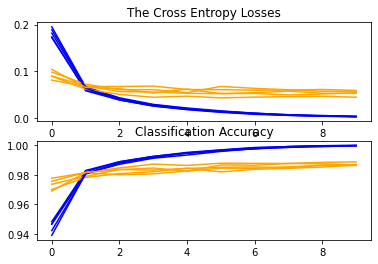

Accuracy : mean = 0.9869500041007996 || Standard Deviation = 0.0008733646164571713 || n = 5


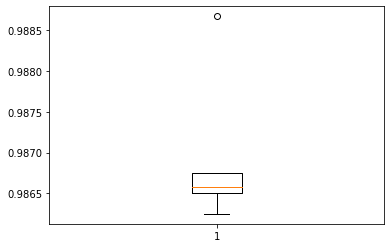

In [14]:
driver_harness()

In [29]:
### Batch Normalized model of CNN ###

def BN_model():

  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dense(10, activation='softmax'))
 
  ### Model Compilation ###
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [30]:
### BN Model Evaluation function ###

def BN_model_evaluator(datasetX,datasety , n_folds = 5 ):
  scores , histories = list() , list()

  ### Cross Validation Block ###
  kfold = KFold( n_folds , shuffle = True , random_state = 1 )

  ### Performing the Dataset Splits ###
  for trainset_ix,testset_ix in kfold.split(datasetX,datasety):

    ### Model Defination
    model = BN_model()

    ### Selecting appropriate rows for trainset and testset
    trainsetX , trainsety  = datasetX[trainset_ix] , datasety[trainset_ix] 
    testsetX , testsety = datasetX[testset_ix] , datasety[testset_ix] 

    ### Model training or fitting ###
    history = model.fit(trainsetX , trainsety , epochs = 10 , batch_size = 32 , validation_data = (testsetX , testsety), verbose = 1)

    ### Model Evaluation ###
    _ , accuracy = model.evaluate(testsetX , testsety , verbose=1)
    print("Model evalutation accuracy : {}%".format(accuracy * 100.0))

    ### Log the Scores ###
    scores.append(accuracy)
    histories.append(history)

  return scores , histories

In [31]:
def BN_improv_driver_harness():

  ### Loading the dataset ###
  trainsetX , trainsety , testsetX , testsety = load_dataset()

  ### Normalizing the pixel values of the hadwritten images ###
  trainsetX , testsetX = normalization(trainsetX,testsetX)

  ### Model Evaluation ###
  scores, histories = BN_model_evaluator(trainsetX, trainsety)

  ### Visualizations of the diagnostics ###
  diagnostics(histories)

  ### Visual of the estimation performances ###
  performance_summarizer(scores)

Epoch 1/10
1500/1500 [==============================] - 65s 42ms/step - loss: 0.2263 - accuracy: 0.9313 - val_loss: 0.0736 - val_accuracy: 0.9787
Epoch 2/10
1500/1500 [==============================] - 62s 41ms/step - loss: 0.0493 - accuracy: 0.9856 - val_loss: 0.0586 - val_accuracy: 0.9824
Epoch 3/10
1500/1500 [==============================] - 64s 42ms/step - loss: 0.0284 - accuracy: 0.9914 - val_loss: 0.0612 - val_accuracy: 0.9825
Epoch 4/10
1500/1500 [==============================] - 64s 43ms/step - loss: 0.0182 - accuracy: 0.9946 - val_loss: 0.0540 - val_accuracy: 0.9853
Epoch 5/10
1500/1500 [==============================] - 64s 43ms/step - loss: 0.0141 - accuracy: 0.9954 - val_loss: 0.0544 - val_accuracy: 0.9851
Epoch 6/10
1500/1500 [==============================] - 63s 42ms/step - loss: 0.0089 - accuracy: 0.9978 - val_loss: 0.0570 - val_accuracy: 0.9852
Epoch 7/10
1500/1500 [==============================] - 62s 41ms/step - loss: 0.0051 - accuracy: 0.9990 - val_loss: 0.0565 -

<ipython-input-11-089ef1bc3434>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot( 2 , 1 , 1 )
<ipython-input-11-089ef1bc3434>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot( 2 , 1 , 2 )


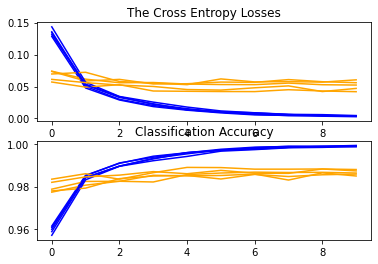

Accuracy : mean = 0.98656667470932 || Standard Deviation = 0.0010883285870561294 || n = 5


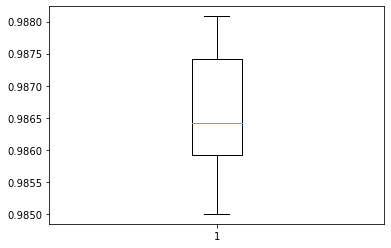

In [32]:
BN_improv_driver_harness()

In [33]:
### Increased Depth of CNN ### 

def debth_increased_model():

  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
 
  ### Model Compilation ###
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [34]:
### BN Model Evaluation function ###

def deeper_cnn_model_evaluator(datasetX,datasety , n_folds = 5 ):
  scores , histories = list() , list()

  ### Cross Validation Block ###
  kfold = KFold( n_folds , shuffle = True , random_state = 1 )

  ### Performing the Dataset Splits ###
  for trainset_ix,testset_ix in kfold.split(datasetX,datasety):

    ### Model Defination
    model = debth_increased_model()

    ### Selecting appropriate rows for trainset and testset
    trainsetX , trainsety  = datasetX[trainset_ix] , datasety[trainset_ix] 
    testsetX , testsety = datasetX[testset_ix] , datasety[testset_ix] 

    ### Model training or fitting ###
    history = model.fit(trainsetX , trainsety , epochs = 10 , batch_size = 32 , validation_data = (testsetX , testsety), verbose = 1)

    ### Model Evaluation ###
    _ , accuracy = model.evaluate(testsetX , testsety , verbose=1)
    print("Model evalutation accuracy : {}%".format(accuracy * 100.0))

    ### Log the Scores ###
    scores.append(accuracy)
    histories.append(history)

  return scores , histories

In [35]:
### Batch Normalized model of CNN ###

def BN_model():

  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dense(10, activation='softmax'))
 
  ### Model Compilation ###
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [36]:
### BN Model Evaluation function ###

def BN_model_evaluator(datasetX,datasety , n_folds = 5 ):
  scores , histories = list() , list()

  ### Cross Validation Block ###
  kfold = KFold( n_folds , shuffle = True , random_state = 1 )

  ### Performing the Dataset Splits ###
  for trainset_ix,testset_ix in kfold.split(datasetX,datasety):

    ### Model Defination
    model = BN_model()

    ### Selecting appropriate rows for trainset and testset
    trainsetX , trainsety  = datasetX[trainset_ix] , datasety[trainset_ix] 
    testsetX , testsety = datasetX[testset_ix] , datasety[testset_ix] 
### Model training or fitting ###
    history = model.fit(trainsetX , trainsety , epochs = 10 , batch_size = 32 , validation_data = (testsetX , testsety), verbose = 1)

    ### Model Evaluation ###
    _ , accuracy = model.evaluate(testsetX , testsety , verbose=1)
    print("Model evalutation accuracy : {}%".format(accuracy * 100.0))

    ### Log the Scores ###
    scores.append(accuracy)
    histories.append(history)

  return scores , histories

In [37]:
def deeper_cnn_improv_driver_harness():

  ### Loading the dataset ###
  trainsetX , trainsety , testsetX , testsety = load_dataset()

  ### Normalizing the pixel values of the hadwritten images ###
  trainsetX , testsetX = normalization(trainsetX,testsetX)

  ### Model Evaluation ###
  scores, histories = deeper_cnn_model_evaluator(trainsetX, trainsety)

  ### Visualizations of the diagnostics ###
  diagnostics(histories)

  ### Visual of the estimation performances ###
  performance_summarizer(scores)

Epoch 1/10
1500/1500 [==============================] - 77s 50ms/step - loss: 0.3222 - accuracy: 0.9026 - val_loss: 0.0892 - val_accuracy: 0.9733
Epoch 2/10
1500/1500 [==============================] - 71s 48ms/step - loss: 0.0550 - accuracy: 0.9829 - val_loss: 0.0530 - val_accuracy: 0.9834
Epoch 3/10
1500/1500 [==============================] - 76s 51ms/step - loss: 0.0299 - accuracy: 0.9900 - val_loss: 0.0457 - val_accuracy: 0.9872
Epoch 4/10
1500/1500 [==============================] - 78s 52ms/step - loss: 0.0218 - accuracy: 0.9926 - val_loss: 0.0408 - val_accuracy: 0.9894
Epoch 5/10
1500/1500 [==============================] - 77s 52ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0633 - val_accuracy: 0.9861
Epoch 6/10
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0136 - accuracy: 0.9956 - val_loss: 0.0451 - val_accuracy: 0.9887
Epoch 7/10
1500/1500 [==============================] - 70s 47ms/step - loss: 0.0086 - accuracy: 0.9976 - val_loss: 0.0453 -

<ipython-input-11-089ef1bc3434>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot( 2 , 1 , 1 )
<ipython-input-11-089ef1bc3434>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot( 2 , 1 , 2 )


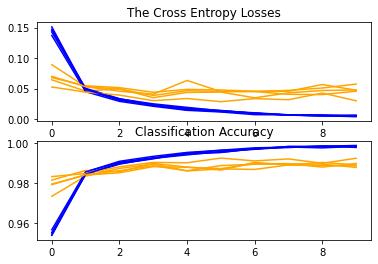

Accuracy : mean = 0.9894666790962219 || Standard Deviation = 0.001574633314169575 || n = 5


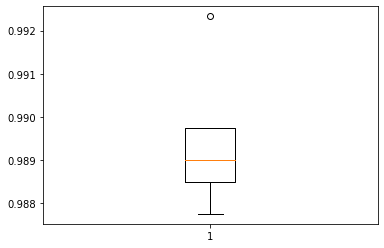

In [38]:
deeper_cnn_improv_driver_harness()

In [39]:
def saving_deeper_cnn_improv_driver_harness():

  ### Loading the dataset ###
  trainsetX , trainsety , testsetX , testsety = load_dataset()

  ### Normalizing the pixel values of the hadwritten images ###
  trainsetX , testsetX = normalization(trainsetX,testsetX)

  ### Creating a model for training purposes ###

  model = debth_increased_model()

  ### Training the initiatilized model ###

  model.fit(trainsetX, trainsety, epochs=10, batch_size=32, verbose=1)
 
  ### Saving the trained model as h5 ###

  model.save('deeper_cnn_model.h5')

In [40]:
saving_deeper_cnn_improv_driver_harness()

Epoch 1/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2600 - accuracy: 0.9172
Epoch 2/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0463 - accuracy: 0.9854
Epoch 3/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0272 - accuracy: 0.9914
Epoch 4/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0200 - accuracy: 0.9941
Epoch 5/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0144 - accuracy: 0.9953
Epoch 6/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0098 - accuracy: 0.9971
Epoch 7/10
1875/1875 [==============================] - 57073s 30s/step - loss: 0.0070 - accuracy: 0.9979
Epoch 8/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0079 - accuracy: 0.9974
Epoch 9/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0053 - accuracy: 0.9982
Epoch 10/10
1875/1875 [==============================] - 81s 4

In [50]:
### Evaluate the deep model on the test dataset ###

from keras.datasets import mnist
from keras.models import load_model
from keras.utils import to_categorical

def final_model_driver_harness():

  ### Loading the dataset ###
  trainsetX , trainsety , testsetX , testsety = load_dataset()

  ### Normalizing the pixel values of the hadwritten images ###
  trainsetX , testsetX = normalization(trainsetX,testsetX)

  ### Load the final trained deeper model ###

  model = load_model('deeper_cnn_model.h5')

  ### Evaluation of the model on the test dataset ###

  _,accuracy, = model.evaluate(testsetX,testsety , verbose=1)
  print("Final Model Evaluation : {}".format(accuracy * 100.0))

In [51]:
final_model_driver_harness()

313/313 [==============================] - 4s 11ms/step - loss: 0.0307 - accuracy: 0.9909
Final Model Evaluation : 99.08999800682068


In [52]:
### Load and Prepare the image ###

def load_image(filename):
	### Load the image ###
	img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
 
	### Convert to array ###
	img = img_to_array(img)
 
	### Reshape into a single sample with 1 channel ###
	img = img.reshape(1, 28, 28, 1)
 
	### Prepare pixel data ###
  
	img = img.astype('float32')
	img = img / 255.0
	return img

In [53]:
import os
from IPython.display import display, Image

url1 = 'https://user-images.githubusercontent.com/67789350/103252212-d78f7f00-49a1-11eb-84de-98003d0fb79a.png'
os.system('wget {}'.format(url1))
os.rename('103252212-d78f7f00-49a1-11eb-84de-98003d0fb79a.png','sample_mnist_digit_7.png') 

display(Image(filename='sample_mnist_digit_7.png'))

### This is out test sample that we must pass through our model ###

FileNotFoundError: [WinError 2] The system cannot find the file specified: '103252212-d78f7f00-49a1-11eb-84de-98003d0fb79a.png' -> 'sample_mnist_digit_7.png'

In [ ]:
import random 
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

def prediction_driver_harness():

	# load the image
	img = load_image("sample_mnist_digit_7.png")
 
	# load model

	model = load_model('deeper_cnn_model.h5')
 
	# predict the class
	digit = model.predict_classes(img)
	print("Predicted Image from our Final model : {}".format(digit[0]))

In [ ]:
prediction_driver_harness()